## **ETL LESIONES**

In [97]:
# Importar librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import locale

Cargamos los datos 

In [98]:
# Cargar datos de víctimas de homicidios desde el archivo Excel
lesiones_victimas = pd.read_excel("data/lesiones.xlsx", sheet_name="VICTIMAS")

# Cargar datos de hechos relacionados con homicidios desde el mismo archivo Excel
lesiones_hechos = pd.read_excel("data/lesiones.xlsx", sheet_name="HECHOS")

Estudiamos el df antes de hacer el merge

In [99]:
lesiones_hechos.columns

Index(['id', 'n_victimas', 'aaaa', 'mm', 'dd', 'fecha', 'hora', 'franja_hora',
       'direccion_normalizada', 'comuna', 'tipo_calle', 'otra_direccion',
       'calle', 'altura', 'cruce', 'geocodificacion_CABA', 'longitud',
       'latutid', 'victima', 'acusado', 'participantes', 'moto', 'auto',
       'transporte_publico', 'camion', 'ciclista', 'gravedad'],
      dtype='object')

In [100]:
lesiones_hechos.head()

,id,n_victimas,aaaa,mm,dd,fecha,hora,franja_hora,direccion_normalizada,comuna,...,latutid,victima,acusado,participantes,moto,auto,transporte_publico,camion,ciclista,gravedad
0,LC-2019-0000179,1,2019,1,1,2019-01-01 00:00:00,09:00:00,9,SD,14,...,-34.559658,CICLISTA,SD,CICLISTA-SD,SD,SD,SD,SD,x,SD
1,LC-2019-0000053,1,2019,1,1,2019-01-01 00:00:00,01:55:00,1,SD,8,...,-34.669125,AUTO,SD,AUTO-SD,SD,x,SD,SD,SD,SD
2,LC-2019-0000063,1,2019,1,1,2019-01-01 00:00:00,02:00:00,2,SD,8,...,-34.677556,SD,SD,SD-SD,SD,SD,SD,SD,SD,SD
3,LC-2019-0000079,1,2019,1,1,2019-01-01 00:00:00,02:30:00,2,SD,7,...,-34.647349,PEATON,SD,PEATON-SD,x,SD,SD,SD,SD,SD
4,LC-2019-0000082,4,2019,1,1,2019-01-01 00:00:00,04:30:00,4,SD,3,...,-34.604579,AUTO,SD,AUTO-SD,SD,SD,x,SD,SD,SD


In [101]:
# Eliminar columnas no deseadas de 'lesiones_hechos'
lesiones_hechos.drop(columns=['otra_direccion', 'altura', 'participantes', 'moto', 'auto', 'transporte_publico', 'camion', 'ciclista', 'direccion_normalizada', 'calle'], inplace=True)
# Renombrar columnas 
lesiones_hechos.rename(columns={'aaaa': 'año', 'mm': 'mes', 'dd': 'dia', 'latutid': 'latitud','direccion_normalizada': 'direccion'}, inplace=True)

In [102]:
lesiones_hechos.head()

,id,n_victimas,año,mes,dia,fecha,hora,franja_hora,comuna,tipo_calle,cruce,geocodificacion_CABA,longitud,latitud,victima,acusado,gravedad
0,LC-2019-0000179,1,2019,1,1,2019-01-01 00:00:00,09:00:00,9,14,SD,NaN,Point (104991.46333918849995825 107720.9664748...,-58.408911,-34.559658,CICLISTA,SD,SD
1,LC-2019-0000053,1,2019,1,1,2019-01-01 00:00:00,01:55:00,1,8,SD,NaN,Point (101813.84712503915943671 95578.55507230...,-58.44351,-34.669125,AUTO,SD,SD
2,LC-2019-0000063,1,2019,1,1,2019-01-01 00:00:00,02:00:00,2,8,SD,NaN,Point (99538.58660300650808495 94643.418717990...,-58.468335,-34.677556,SD,SD,SD
3,LC-2019-0000079,1,2019,1,1,2019-01-01 00:00:00,02:30:00,2,7,SD,NaN,Point (102372.16830963784013875 97994.13750300...,-58.437425,-34.647349,PEATON,SD,SD
4,LC-2019-0000082,4,2019,1,1,2019-01-01 00:00:00,04:30:00,4,3,SD,NaN,Point (105968.98286849579017144 102737.1734686...,-58.398225,-34.604579,AUTO,SD,SD


In [103]:
# Viendo las columnas que nos quedan
lesiones_victimas.columns

Index(['ID hecho', 'AAA', 'MM', 'DD', 'FECHA ', 'VEHICULO_VICTIMA', 'SEXO',
       'EDAD_VICTIMA', 'GRAVEDAD'],
      dtype='object')

In [104]:
#Hacemos los mismo para lesiones_victimas
# Eliminar columnas no deseadas de 'lesiones_victimas'
lesiones_victimas.drop(columns={'AAA', 'MM', 'DD', 'FECHA ', 'GRAVEDAD'}, inplace=True)
# Renombrar columnas 
lesiones_victimas.rename(columns={'ID hecho': 'id', 'VEHICULO_VICTIMA': 'vehiculo', 'SEXO': 'sexo', 'EDAD_VICTIMA': 'edad'}, inplace=True)


In [105]:
lesiones_victimas

,id,vehiculo,sexo,edad
0,LC-2019-0000053,sd,Varon,57
1,LC-2019-0000063,sd,SD,SD
2,LC-2019-0000079,sd,Varon,SD
3,LC-2019-0000082,sd,Varon,45
4,LC-2019-0000082,sd,Mujer,45
...,...,...,...,...
27600,LC-2021-0451911,TRANSPORTE PUBLICO,Varon,87
27601,LC-2021-0530228,TRANSPORTE PUBLICO,Mujer,60
27602,LC-2021-0530228,TRANSPORTE PUBLICO,Mujer,32
27603,LC-2021-0201378,MOTO,Varon,32


Hacemos el merge entre lesiones_hechos y lesiones_victimas

In [106]:
lesiones = pd.merge(lesiones_hechos, lesiones_victimas, on='id')

In [107]:
lesiones.head()

,id,n_victimas,año,mes,dia,fecha,hora,franja_hora,comuna,tipo_calle,cruce,geocodificacion_CABA,longitud,latitud,victima,acusado,gravedad,vehiculo,sexo,edad
0,LC-2019-0000179,1,2019,1,1,2019-01-01 00:00:00,09:00:00,9,14,SD,NaN,Point (104991.46333918849995825 107720.9664748...,-58.408911,-34.559658,CICLISTA,SD,SD,sd,SD,SD
1,LC-2019-0000053,1,2019,1,1,2019-01-01 00:00:00,01:55:00,1,8,SD,NaN,Point (101813.84712503915943671 95578.55507230...,-58.44351,-34.669125,AUTO,SD,SD,sd,Varon,57
2,LC-2019-0000063,1,2019,1,1,2019-01-01 00:00:00,02:00:00,2,8,SD,NaN,Point (99538.58660300650808495 94643.418717990...,-58.468335,-34.677556,SD,SD,SD,sd,SD,SD
3,LC-2019-0000079,1,2019,1,1,2019-01-01 00:00:00,02:30:00,2,7,SD,NaN,Point (102372.16830963784013875 97994.13750300...,-58.437425,-34.647349,PEATON,SD,SD,sd,Varon,SD
4,LC-2019-0000082,4,2019,1,1,2019-01-01 00:00:00,04:30:00,4,3,SD,NaN,Point (105968.98286849579017144 102737.1734686...,-58.398225,-34.604579,AUTO,SD,SD,sd,Varon,45


Miramos los nulos en el dataframe resultante

In [108]:
lesiones.isnull().sum()

id                          0
n_victimas                  0
año                         0
mes                         0
dia                         0
fecha                       0
hora                        0
franja_hora                 5
comuna                    178
tipo_calle                  0
cruce                   16713
geocodificacion_CABA       39
longitud                  270
latitud                   270
victima                     0
acusado                     0
gravedad                    0
vehiculo                    0
sexo                        0
edad                        0
dtype: int64

Trabajamos para eliminar los nulos

In [109]:
# Rellenar los valores nulos en las columnas 'franja_hora' y 'comuna' utilizando el método forward fill
lesiones[['franja_hora', 'comuna']] = lesiones[['franja_hora', 'comuna']].ffill()

# Rellenar los valores nulos en las columnas 'cruce', 'longitud', 'latitud', 'geocodificacion_CABA' con 'SD', '0' o '0' según corresponda
lesiones.fillna({'cruce': 'SD', 'longitud': '0', 'latitud': '0', 'geocodificacion_CABA': '0'}, inplace=True)

# Filtrar las filas donde 'vehiculo' no es 'sd' o 'SD'
lesiones = lesiones[~lesiones['vehiculo'].isin(['sd', 'SD'])]

# Filtrar las filas donde 'sexo' no es 'sd' o 'SD'
lesiones = lesiones[~lesiones['sexo'].isin(['sd', 'SD'])]

# Convertir a minúsculas y eliminar espacios en la columna 'sexo'
lesiones['sexo'] = lesiones['sexo'].str.lower().str.strip()

# Filtrar las filas donde 'edad' no es 'sd' o 'SD'
lesiones = lesiones[~lesiones['edad'].isin(['sd', 'SD'])]

# Convertir a minúsculas en la columna 'gravedad' y reemplazar 'sd' con 'leve'
lesiones['gravedad'] = lesiones['gravedad'].str.lower().replace('sd', 'leve')

In [110]:
# Verificamos que no hay mas nulos
lesiones.isnull().sum()

id                      0
n_victimas              0
año                     0
mes                     0
dia                     0
fecha                   0
hora                    0
franja_hora             0
comuna                  0
tipo_calle              0
cruce                   0
geocodificacion_CABA    0
longitud                0
latitud                 0
victima                 0
acusado                 0
gravedad                0
vehiculo                0
sexo                    0
edad                    0
dtype: int64

In [111]:
lesiones.duplicated().sum()
# Eliminar duplicados en el DataFrame 'lesiones'
lesiones.drop_duplicates(inplace=True)

Cambiamos los tipos de dato para poder trabajar en el EDA sin problema

In [112]:
lesiones.dtypes

id                      object
n_victimas               int64
año                      int64
mes                      int64
dia                      int64
fecha                   object
hora                    object
franja_hora             object
comuna                  object
tipo_calle              object
cruce                   object
geocodificacion_CABA    object
longitud                object
latitud                 object
victima                 object
acusado                 object
gravedad                object
vehiculo                object
sexo                    object
edad                    object
dtype: object

In [113]:
# Convertir 'fecha' a formato de fecha y eliminar filas con fechas no válidas
lesiones['fecha'] = pd.to_datetime(lesiones['fecha'], errors='coerce')
lesiones.dropna(subset=['fecha'], inplace=True)

# Reemplazar 'sd' con '0'
lesiones.replace('sd', '0', inplace=True)

# Convertir 'franja_hora' a tipo entero
lesiones['franja_hora'] = pd.to_numeric(lesiones['franja_hora'], errors='coerce').astype('Int64')

# Convertir columnas a tipo 'category'
columns_to_category = ['tipo_calle', 'victima', 'acusado', 'gravedad', 'vehiculo', 'sexo']
lesiones[columns_to_category] = lesiones[columns_to_category].astype('category')

# Convertir 'edad' a tipo entero y aplicar la división en rangos etarios usando pd.cut()
lesiones['edad'] = pd.to_numeric(lesiones['edad'], errors='coerce').astype('Int64')
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81+']
bins = [0, 11, 21, 31, 41, 51, 61, 71, 81, 100]
lesiones['edad'] = pd.cut(lesiones['edad'], bins=bins, labels=labels)

lesiones.gravedad.replace('GRAVE', 'grave', inplace=True)
lesiones.gravedad.replace('0', 'LEVE', inplace=True)

lesiones.cruce.fillna('no', inplace=True)
lesiones.cruce.replace('SD', 'no', inplace=True)
lesiones['cruce'] = lesiones['cruce'].apply(lambda x: 'si' if x != 'no' else x)

### **EDA**

C:\Users\ramir\AppData\Local\Temp\ipykernel_15352\1175506174.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='comuna', data=lesiones, order=lesiones['comuna'].value_counts().index, palette='viridis')


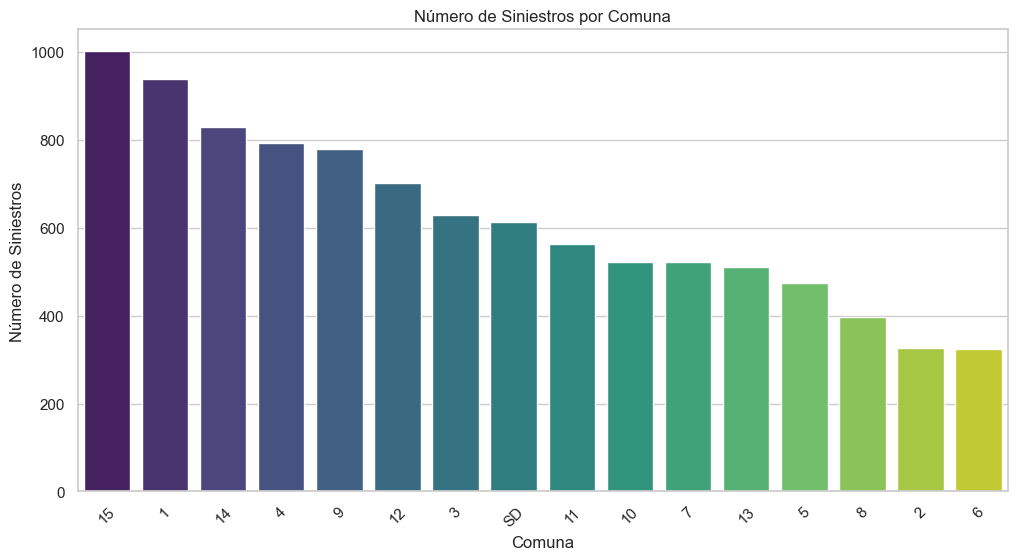

In [114]:
# Gráfico de barras para comuna
plt.figure(figsize=(12, 6))
sns.countplot(x='comuna', data=lesiones, order=lesiones['comuna'].value_counts().index, palette='viridis')
plt.title('Número de Siniestros por Comuna')
plt.xlabel('Comuna')
plt.ylabel('Número de Siniestros')
plt.xticks(rotation=45)
plt.show()

Este gráfico destaca visualmente que la comuna 15 tiene el mayor número de siniestros en comparación con otras comunas. Es una herramienta efectiva para comunicar la distribución de siniestros por comuna en el conjunto de datos mientras que la columa mas afectada en homicidios fue la 1.

C:\Users\ramir\AppData\Local\Temp\ipykernel_15352\1071307549.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='tipo_calle', data=lesiones, palette='muted')


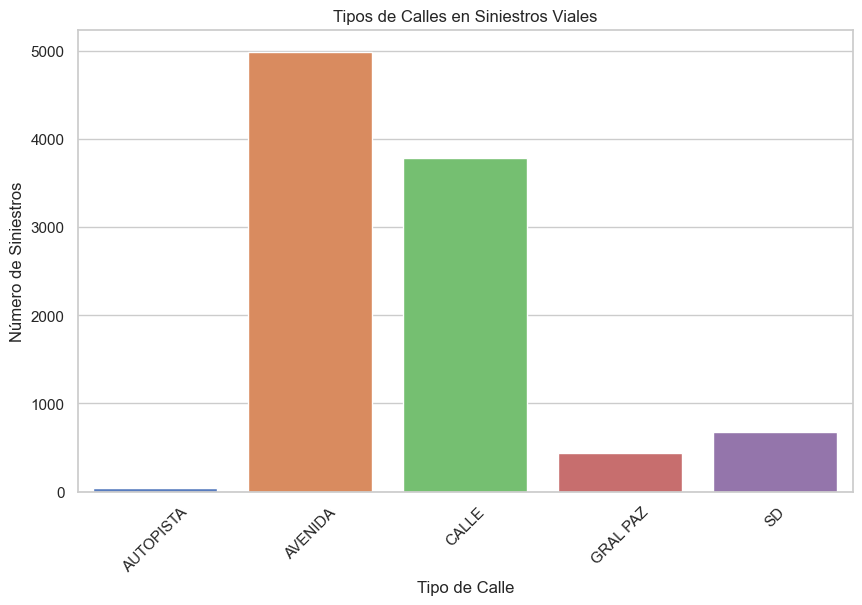

In [115]:
# Gráfico de barras para tipo_calle
plt.figure(figsize=(10, 6))
sns.countplot(x='tipo_calle', data=lesiones, palette='muted')
plt.title('Tipos de Calles en Siniestros Viales')
plt.xlabel('Tipo de Calle')
plt.ylabel('Número de Siniestros')
plt.xticks(rotation=45)
plt.show()

Este gráfico te permite concluir que las avenidas son el tipo de calle más frecuente en los siniestros viales según tu conjunto de datos al igual que en homicidios

C:\Users\ramir\AppData\Local\Temp\ipykernel_15352\3200558958.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='vehiculo', data=lesiones, palette='pastel')


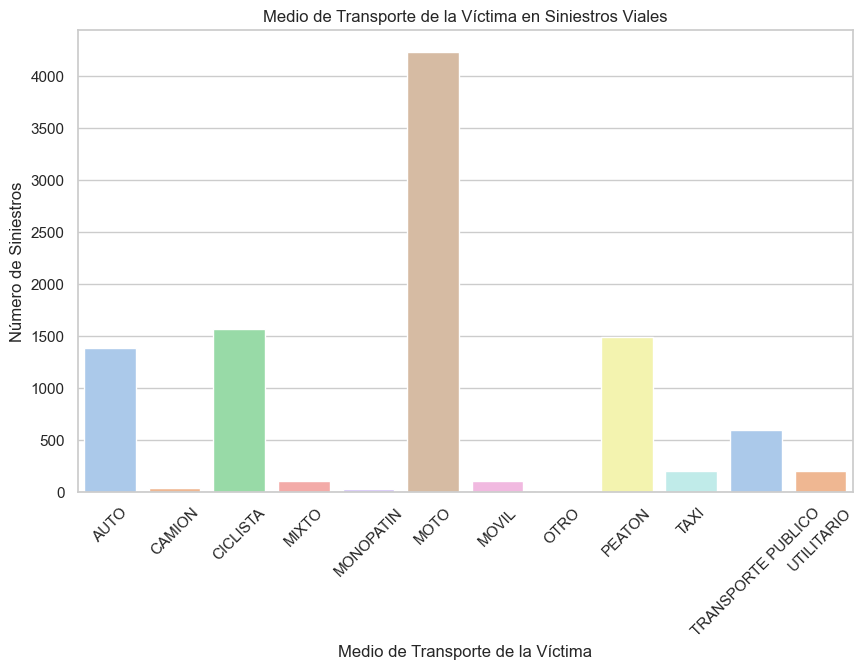

In [138]:
# Gráfico de barras para medio de transporte de la víctima
plt.figure(figsize=(10, 6))
sns.countplot(x='vehiculo', data=lesiones, palette='pastel')
plt.title('Medio de Transporte de la Víctima en Siniestros Viales')
plt.xlabel('Medio de Transporte de la Víctima')
plt.ylabel('Número de Siniestros')
plt.xticks(rotation=45)
plt.show()

Este gráfico te permite concluir que las motos son el medio de transporte de las víctimas más frecuente en los siniestros viales de acuerdo con los datos proporcionados al igual que en homicidios .

C:\Users\ramir\AppData\Local\Temp\ipykernel_15352\1608066198.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='gravedad', data=lesiones, palette='dark')


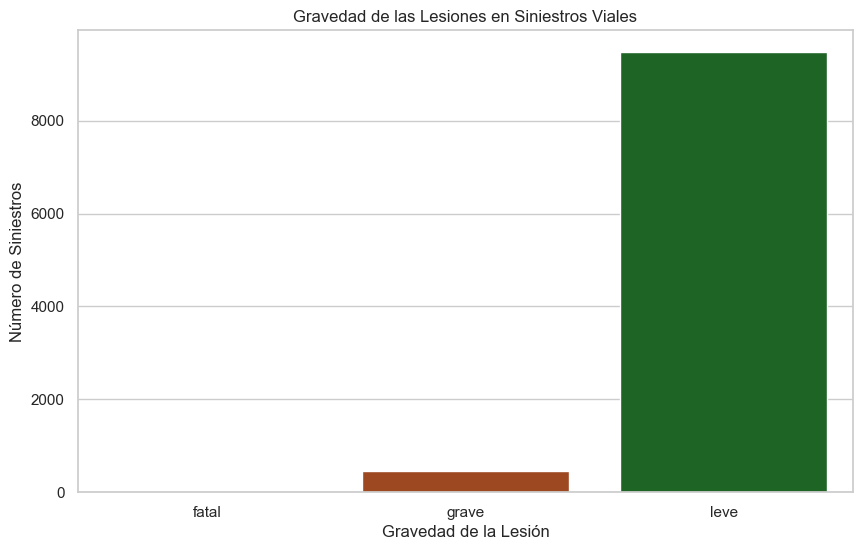

In [117]:
# Gráfico de barras para gravedad
plt.figure(figsize=(10, 6))
sns.countplot(x='gravedad', data=lesiones, palette='dark')
plt.title('Gravedad de las Lesiones en Siniestros Viales')
plt.xlabel('Gravedad de la Lesión')
plt.ylabel('Número de Siniestros')
plt.show()

Los siniestros en su gran mayoria son lesiones leves

C:\Users\ramir\AppData\Local\Temp\ipykernel_15352\1786535975.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sexo', data=lesiones, palette='Set2')


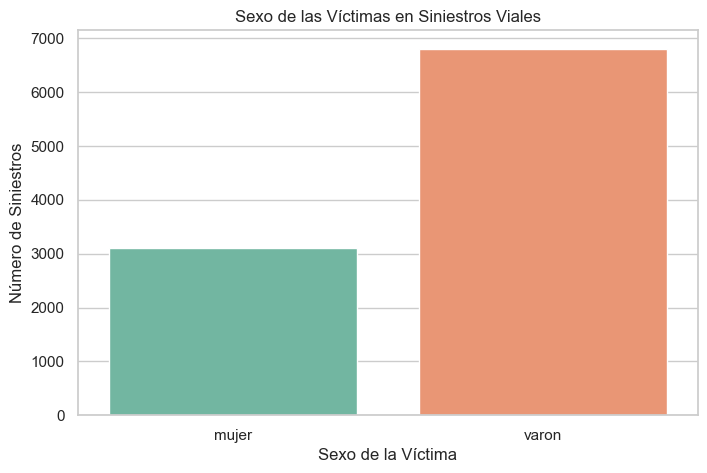

In [118]:
# Gráfico de barras para sexo de la víctima
plt.figure(figsize=(8, 5))
sns.countplot(x='sexo', data=lesiones, palette='Set2')
plt.title('Sexo de las Víctimas en Siniestros Viales')
plt.xlabel('Sexo de la Víctima')
plt.ylabel('Número de Siniestros')
plt.show()

 El gráfico de barras para el sexo de la víctima muestra claramente que hay una diferencia significativa entre la cantidad de siniestros viales "lesiones" que involucran a víctimas de sexo masculino en comparación con las víctimas de sexo femenino al igual que en homicidios

C:\Users\ramir\AppData\Local\Temp\ipykernel_15352\1623350914.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='edad', data=lesiones, palette='husl', order=['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81+'])


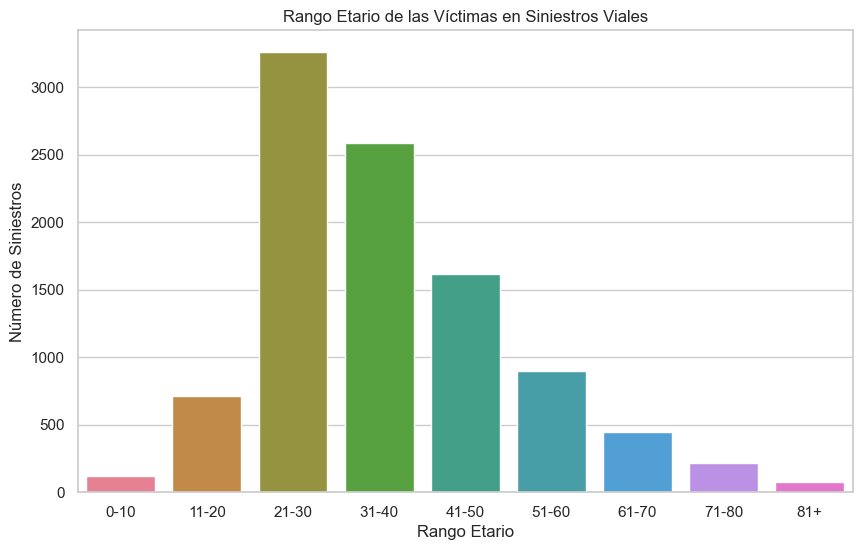

In [119]:
# Gráfico de barras para rango etario de la víctima
plt.figure(figsize=(10, 6))
sns.countplot(x='edad', data=lesiones, palette='husl', order=['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81+'])
plt.title('Rango Etario de las Víctimas en Siniestros Viales')
plt.xlabel('Rango Etario')
plt.ylabel('Número de Siniestros')
plt.show()

 El gráfico de barras para el rango etario de las víctimas destaca que el grupo de edad comprendido entre 21 y 30 años es el más afectado por los siniestros viales "lesiones" según los datos al igual que en homicidios

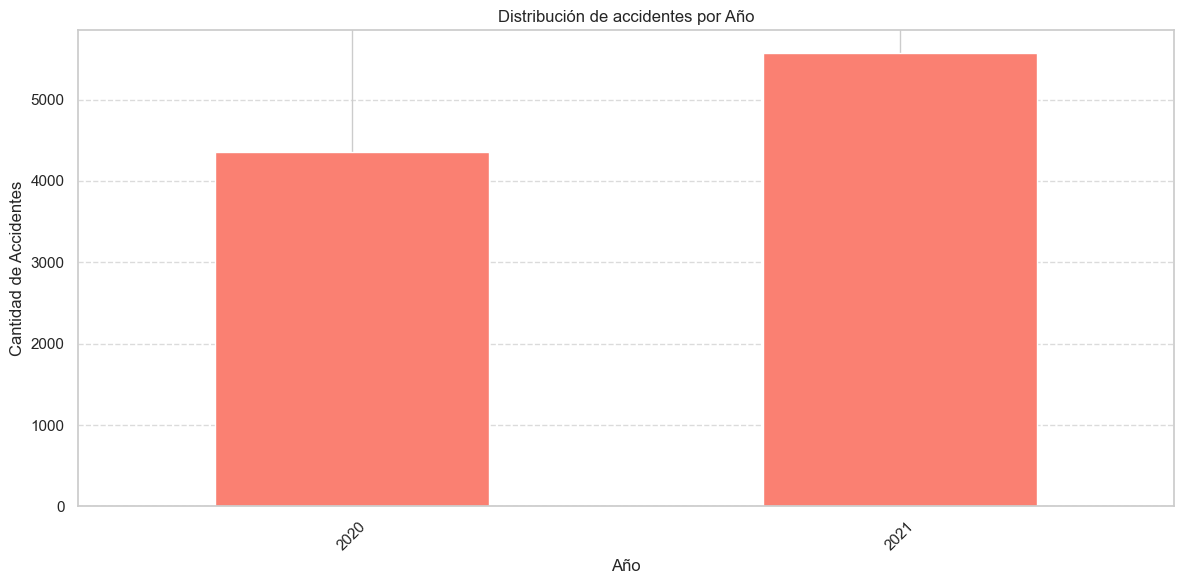

In [122]:
# Obtener el conteo de valores por año y ordenarlos
conteo_anio = lesiones['año'].value_counts().sort_index()

# Crear el gráfico de barras para años
plt.figure(figsize=(12, 6))
conteo_anio.plot(kind='bar', color='salmon')  # Puedes cambiar el color según tu preferencia
plt.title('Distribución de accidentes por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de Accidentes')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


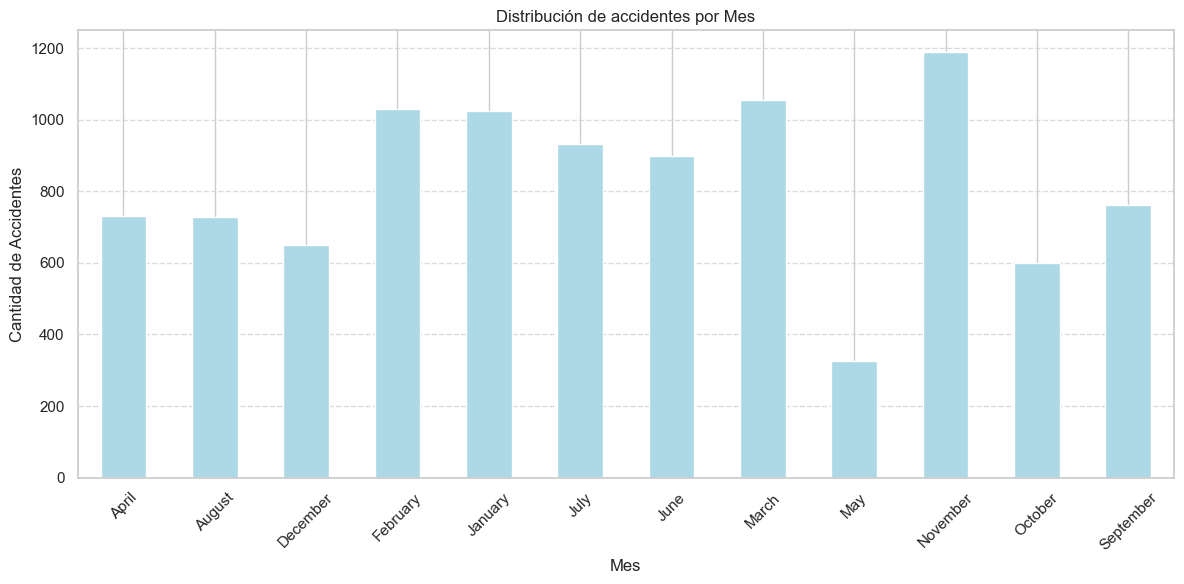

In [135]:
# Obtener el conteo de valores por mes y ordenarlos
conteo_mes = lesiones['mes'].value_counts().sort_index()

# Crear el gráfico de barras para meses
plt.figure(figsize=(12, 6))
conteo_mes.plot(kind='bar', color='lightblue')  # Puedes cambiar el color según tu preferencia
plt.title('Distribución de accidentes por Mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Accidentes')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Sorprende que haya mas lesiones viales en Noviembre porque en homicidios el mes mas afectado fue Diciembre

In [136]:
lesiones.to_csv('data/lesiones_clean.csv')